In [43]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [89]:
def get_usinas_dataframe()->pd.DataFrame:
    out_df = pd.DataFrame()
    for path in glob('FATOR_DE_CAPACIDADE\*.csv'):
        aux_df = pd.read_csv(path, sep=';', parse_dates=['din_instante'])
        aux_df.index = aux_df['din_instante']
        out_df = pd.concat([out_df, aux_df])

    return out_df

In [83]:
def get_usina_solar_pipeline(main_df:pd.DataFrame, nome_usina:str)->pd.DataFrame:
    return main_df.query('nom_tipousina=="Solar"').query('nom_usina_conjunto == @nome_usina')

In [90]:
main_df = get_usinas_dataframe()

In [92]:
conjunto_janauba_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Janaúba')

In [94]:
conjunto_futura_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Futura')

In [96]:
group_by_usina = main_df.query('nom_tipousina=="Solar"').groupby(['nom_usina_conjunto', 'id_estado','id_subsistema']).agg({'val_capacidadeinstalada':'last'}).sort_values(by='val_capacidadeinstalada',ascending=False)

In [105]:
group_by_usina

,,,val_capacidadeinstalada
nom_usina_conjunto,id_estado,id_subsistema,
Conj. Janaúba,MG,SE,1020.360000
Conj. Futura,BA,NE,692.445600
Conj. São Gonçalo,PI,NE,575.725333
Conj. Sol do Cerrado,MG,SE,512.100000
Conj. Lar do Sol,MG,SE,494.970000
Conj. Sol do Sertão,BA,NE,415.030000
Conj. Pirapora,MG,SE,329.000000
Conj. Alex,CE,NE,278.397000
Conj. Serra do Mel C,RN,NE,240.590000


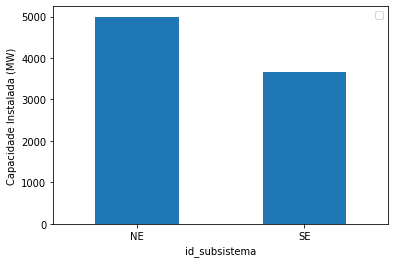

In [108]:
group_by_usina.groupby(by='id_subsistema').agg({'val_capacidadeinstalada':'sum'}).plot( kind='bar', label='id_subsistema', ylabel='Capacidade Instalada (MW)')
plt.tick_params(axis='x',rotation=0)
plt.legend('')

In [107]:
group_by_usina.groupby(by='id_subsistema').agg({'val_capacidadeinstalada':'sum'})

,val_capacidadeinstalada
id_subsistema,
NE,4994.031933
SE,3656.030000


<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

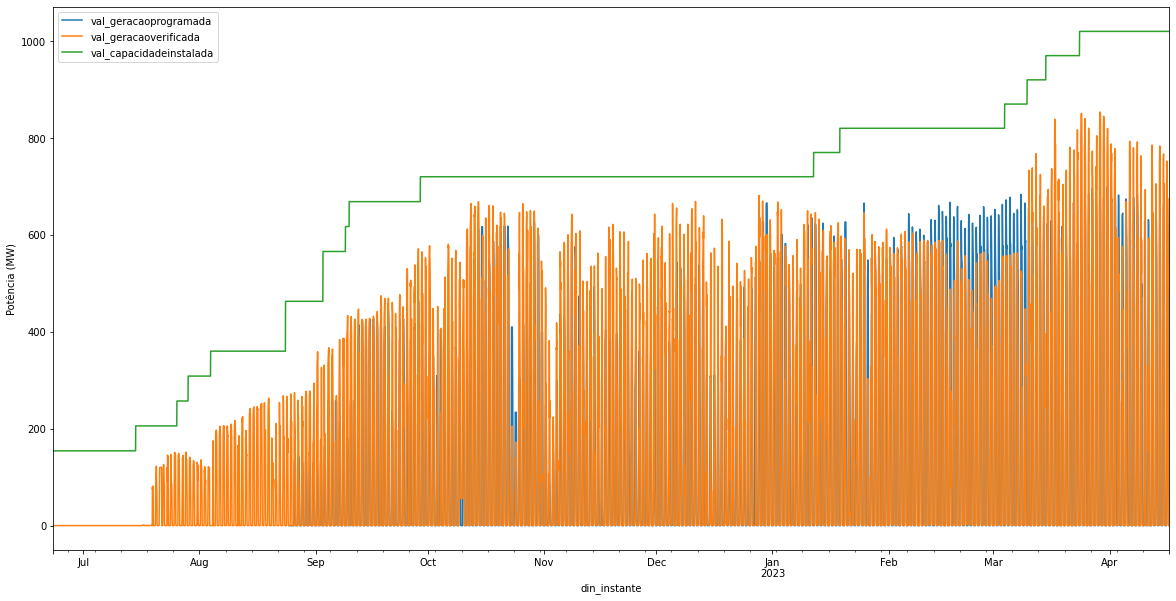

In [109]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

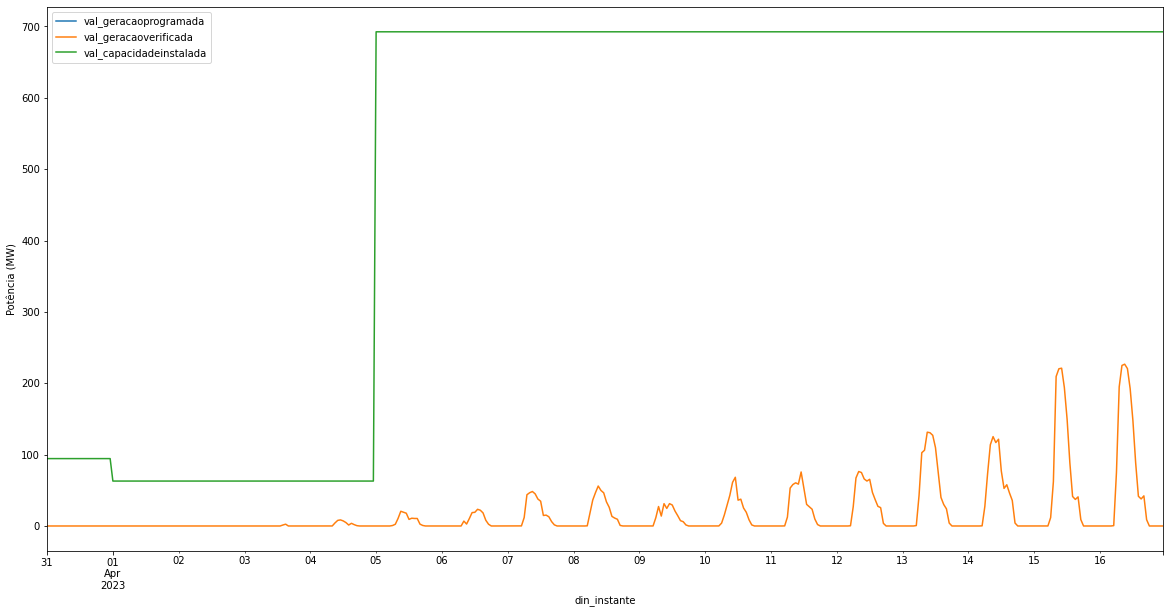

In [110]:
conjunto_futura_df[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

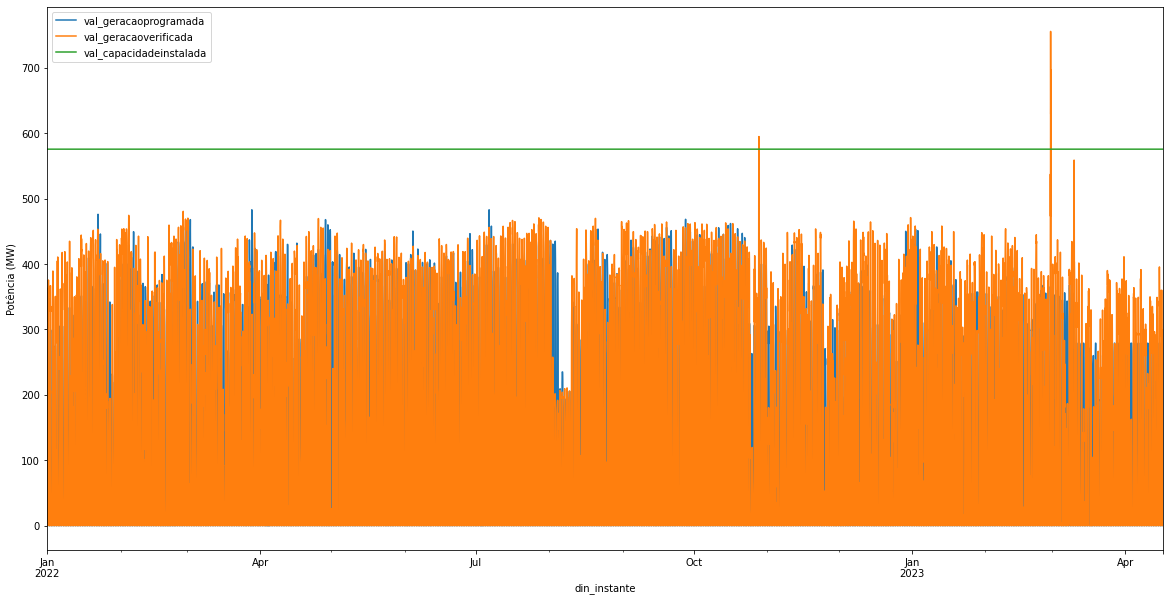

In [115]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. São Gonçalo')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot(figsize=(20,10), ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

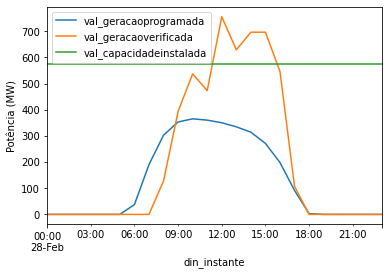

In [113]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. São Gonçalo')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].loc[lambda x: (x.index.day==28)&(x.index.month==2)&(x.index.year==2023)].plot( ylabel='Potência (MW)')

<AxesSubplot:xlabel='din_instante'>

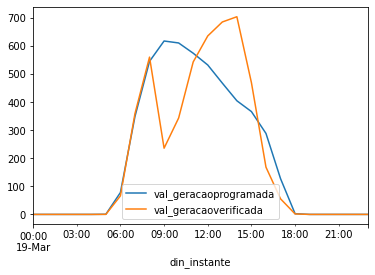

In [15]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==19)&(x.index.month==3)].plot()

<AxesSubplot:xlabel='din_instante'>

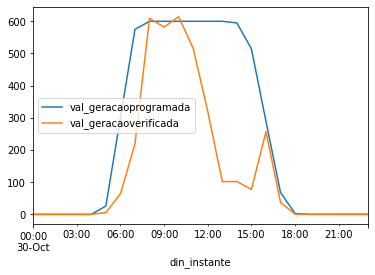

In [16]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==30)&(x.index.month==10)].plot()

<AxesSubplot:xlabel='din_instante'>

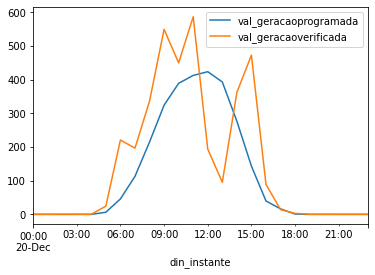

In [17]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==20)&(x.index.month==12)].plot()

<AxesSubplot:xlabel='din_instante'>

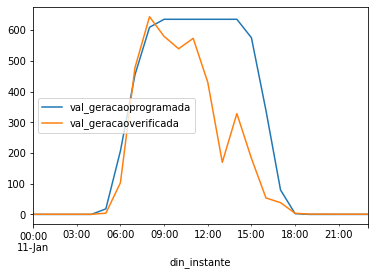

In [24]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==11)&(x.index.month==1)&(x.index.year==2023)].plot()